# Linear regression on trees

First, let's load the data:

In [36]:
# Loading the data
myData = read.table(file="arbres-tot.csv", sep=";", skip=3, header=TRUE)
myData = myData[myData$X0.1 != 0,]

myData

,X2024288,Arbre,Jardin,BOIS.DE.VINCENNES,X,X.1,ARBORETUM.DE.L.ECOLE.DU.BREUIL...ROUTE.DE.LA.FERME...ROUTE.DE.LA.PYRAMIDE,X720060128,Epicéa,Picea,abies,X.2,X0,X0.1,X.3,NON,X6858056.5459.660147.394999
,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,139244,Arbre,Jardin,PARIS 16E ARRDT,,NA,SQUARE ROGER COQUOIN / 14 AVENUE FERDINAND BUISSON,000101025,Epicéa,Picea,abies,,70,10,Jeune (arbre)Adulte,NON,"6859769.8839,645337.503999"
2,2015711,Arbre,Jardin,BOIS DE VINCENNES,,NA,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,00320021,Epicéa,Picea,abies,,105,17,Adulte,NON,"6859673.2219,659205.991999"
3,187466,Arbre,DASCO,PARIS 20E ARRDT,,NA,ECOLE MATERNELLE / 94 RUE COURONNES,084704008,Epicéa,Picea,abies,,90,8,Jeune (arbre)Adulte,NON,"6863517.0009,655067.059999"
4,160479,Arbre,CIMETIERE,SEINE-SAINT-DENIS,,NA,CIMETIERE DE PANTIN / DIV 144,D00000144023,Epicéa,Picea,abies,,30,4,,,"6867548.54989,657446.925999"
6,191107,Arbre,DASCO,PARIS 15E ARRDT,,NA,ECOLE MATERNELLE / 35 AVENUE EMILE ZOLA,070801005,Epicéa,Picea,abies,,50,9,Jeune (arbre),NON,"6860963.95689,647282.543999"
7,160477,Arbre,CIMETIERE,SEINE-SAINT-DENIS,,NA,CIMETIERE DE PANTIN / DIV 25,D00000025010,Epicéa,Picea,abies,,160,15,,,"6867611.09989,656435.042999"
8,2033520,Arbre,DJS,SEINE-SAINT-DENIS,TENNIS,NA,PARC DES SPORTS INTERDEPARTEMENTAL DE BOBIGNY / 40 AVENUE DE LA DIVISION LECLERC - BOBIGNY,000206002,Epicéa,Picea,abies,,20,5,,NON,"6867826.3919,657590.646999"
9,197767,Arbre,DJS,PARIS 12E ARRDT,,NA,CENTRE SPORTIF PAUL VALERY / 15 RUE DE LA NOUVELLE CALEDONIE,00320005,Epicéa,Picea,pungens,,70,10,Jeune (arbre)Adulte,NON,"6859943.9599,656755.693999"
10,2012242,Arbre,Jardin,BOIS DE VINCENNES,,NA,INSEP / AVENUE DU TREMBLAY,00090049,Epicéa,Picea,abies,,90,10,Adulte,NON,"6859465.63589,659515.347999"


## 1. Simple regression

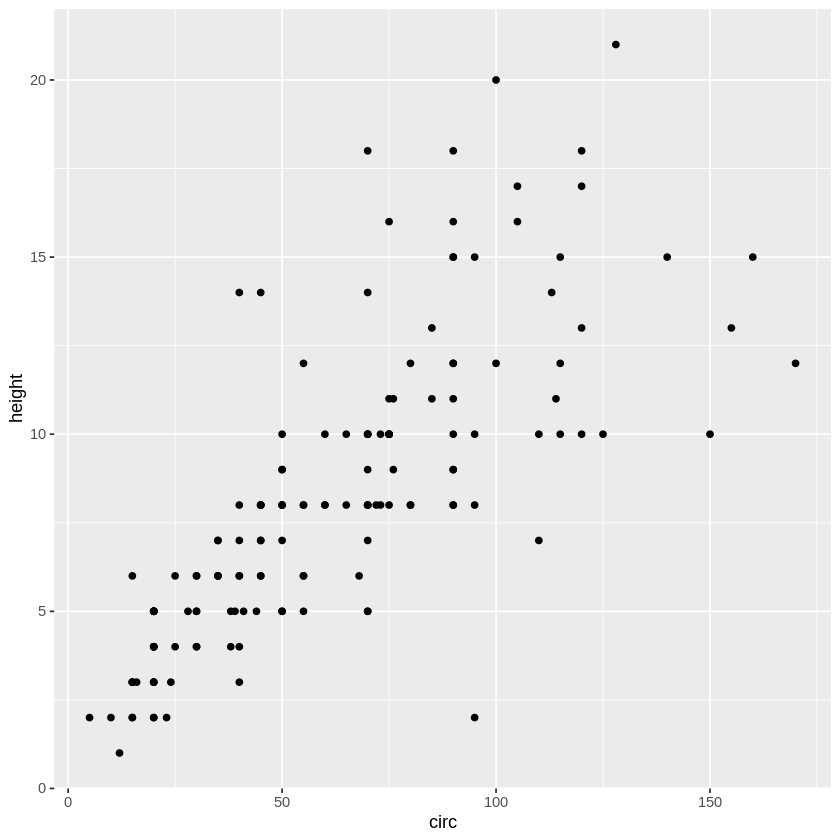

In [40]:
library(dplyr)
library(ggplot2)

# X70 = X0
# X10 = X0.1


circ=myData$X0
height=myData$X0.1

ggplot(myData, aes(x=circ, y=height)) + 
    geom_point() +
    xlab("circ") +
    ylab("height")

In [41]:
simple_reg <- lm(height~circ,data=myData)

In [42]:
names(simple_reg)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [43]:
anova(simple_reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
circ,1,1510.150,1510.150473,198.9893,3.087307e-29
Residuals,149,1130.777,7.589105,NA,NA


In [44]:
summary(simple_reg)



Call:
lm(formula = height ~ circ, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2404 -1.6106 -0.2861  1.1016  9.0116 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.683057   0.454383   5.905  2.3e-08 ***
circ        0.090077   0.006386  14.106  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.755 on 149 degrees of freedom
Multiple R-squared:  0.5718,	Adjusted R-squared:  0.569 
F-statistic:   199 on 1 and 149 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



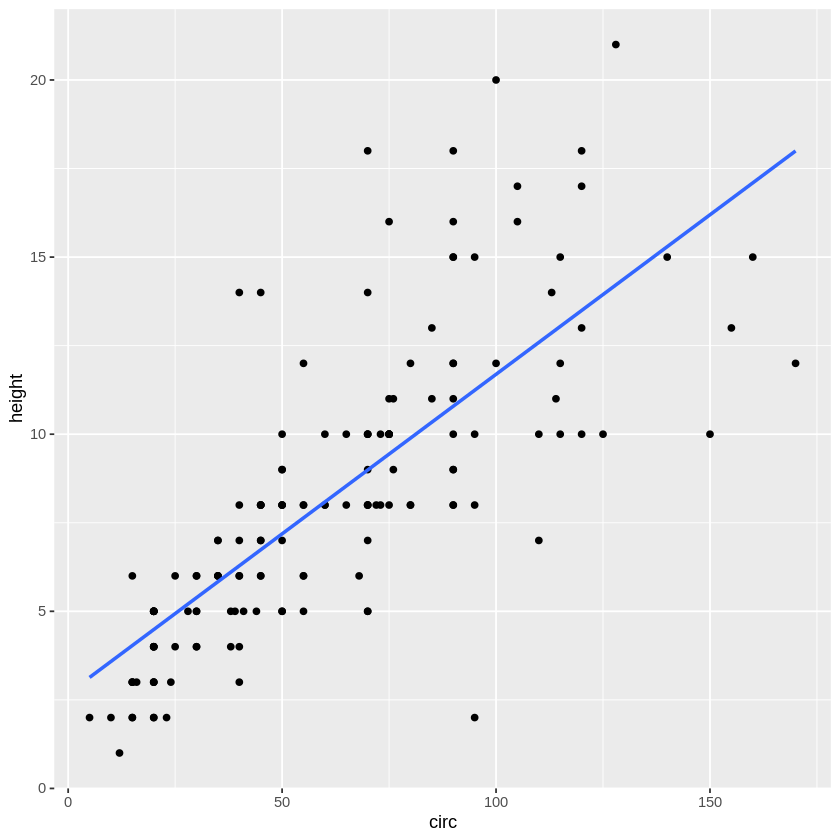

In [45]:
ggplot(myData,aes(x=circ,y=height))+ geom_point()+
  stat_smooth(method="lm",se=FALSE)+ xlab("circ")+
  ylab("height")

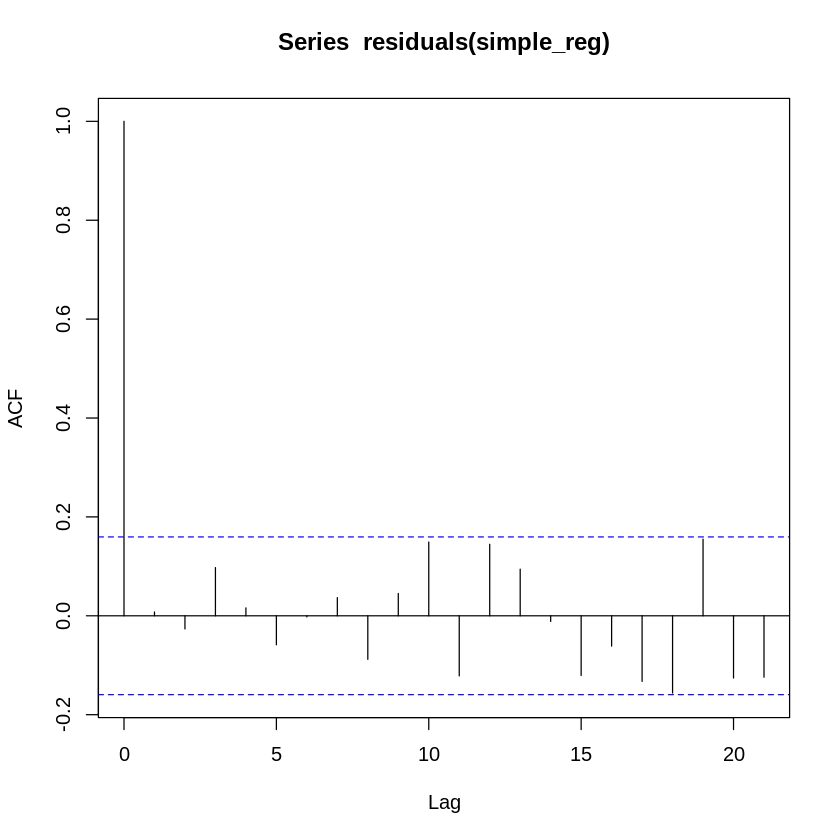

In [46]:
 acf(residuals(simple_reg))

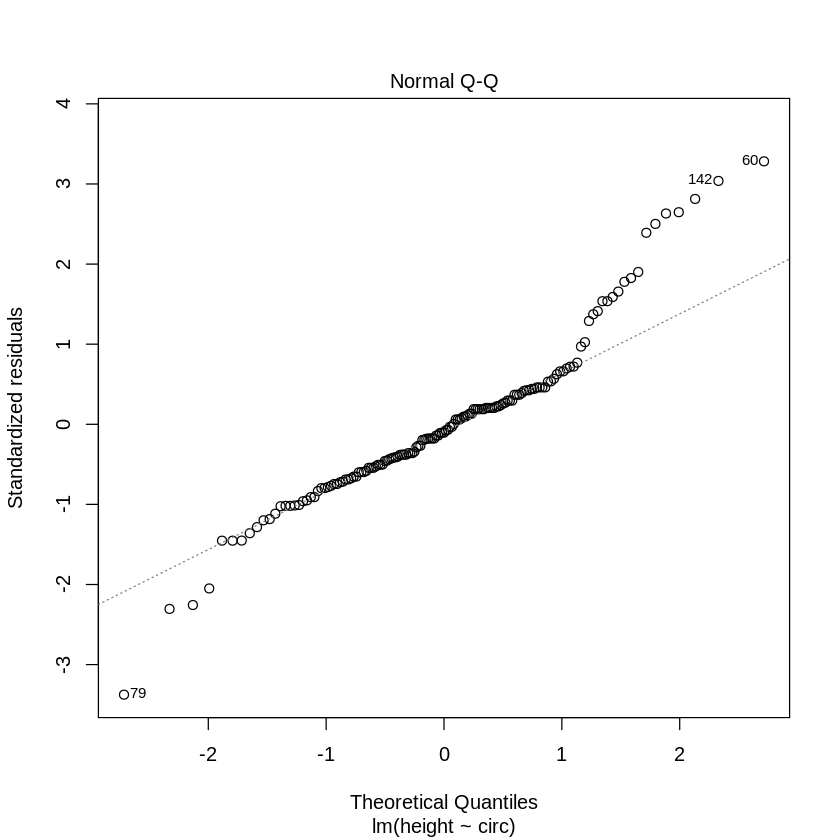

In [47]:
 plot(simple_reg,2)

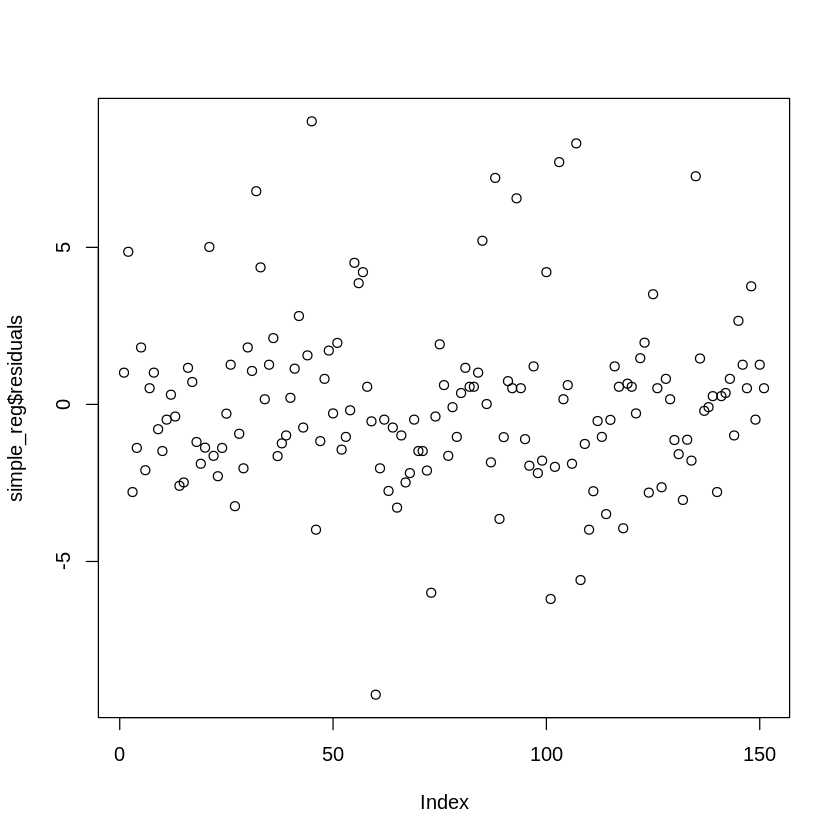

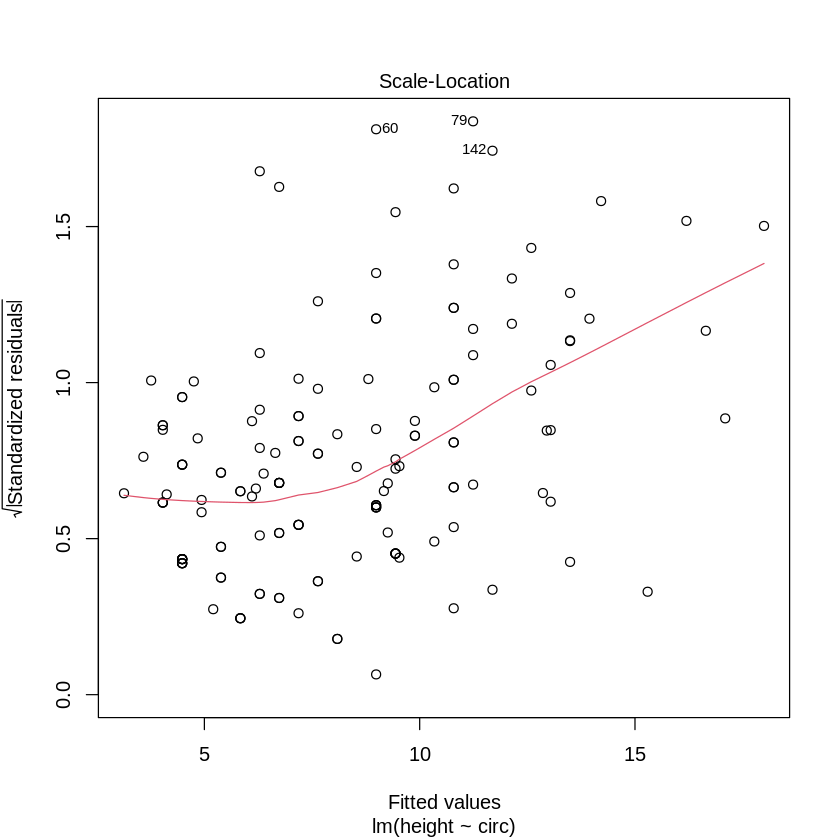

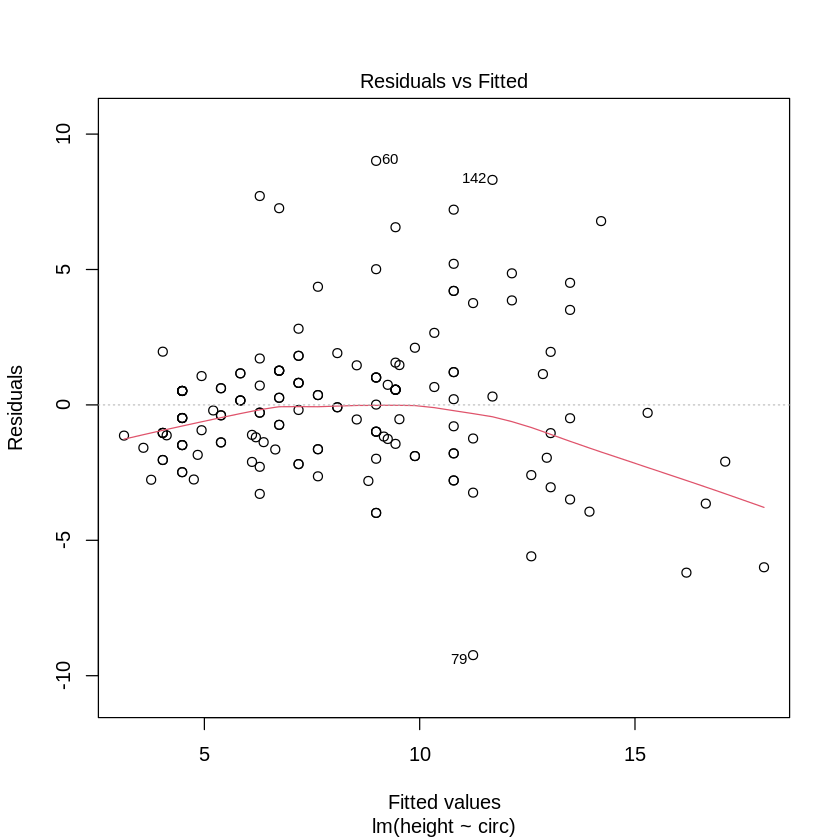

In [48]:
plot(simple_reg$residuals)
plot(simple_reg,3)
plot(simple_reg,1)

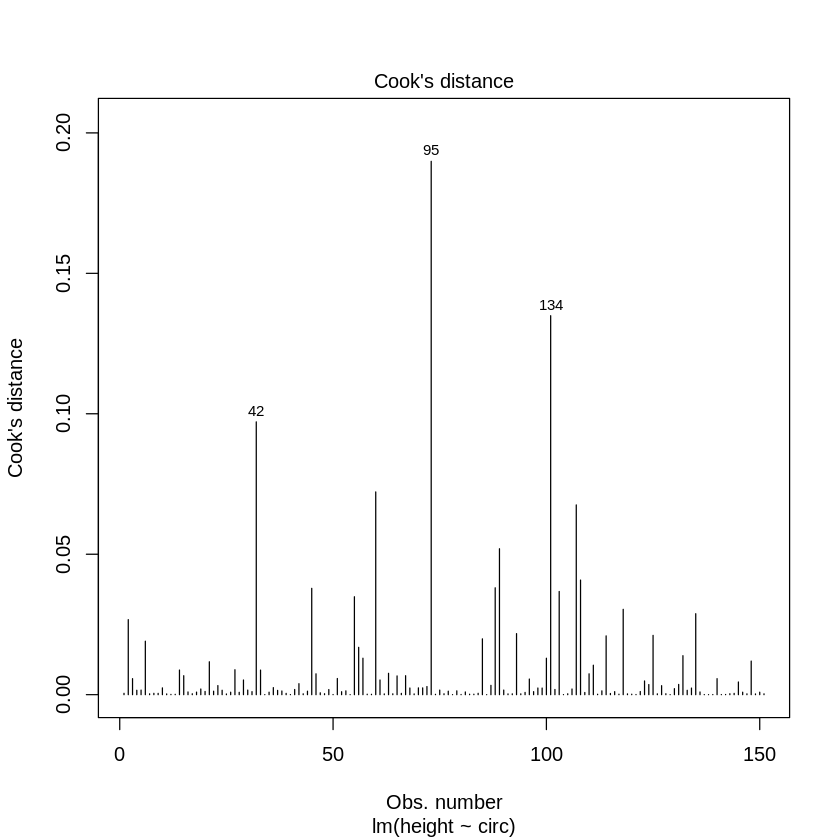

In [49]:
plot(simple_reg,4)

In [54]:
predict(simple_reg, data.frame(circ=10),interval="prediction")

,fit,lwr,upr
1,3.583826,-1.916868,9.08452


In [57]:
myData$circ_sqrt <- sqrt(myData$X0.1)

In [58]:
multi_reg <- lm(height~circ+circ_sqrt,data=myData)
summary(multi_reg)


Call:
lm(formula = height ~ circ + circ_sqrt, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5485 -0.4627 -0.2689  0.2216  2.7116 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.3239396  0.2410869 -30.379   <2e-16 ***
circ        -0.0002866  0.0024993  -0.115    0.909    
circ_sqrt    5.6158080  0.1192134  47.107   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6912 on 148 degrees of freedom
Multiple R-squared:  0.9732,	Adjusted R-squared:  0.9729 
F-statistic:  2690 on 2 and 148 DF,  p-value: < 2.2e-16


In [59]:
multi_reg_2 <- lm(height~circ_sqrt,data=myData)
summary(multi_reg_2)


Call:
lm(formula = height ~ circ_sqrt, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5417 -0.4605 -0.2782  0.2208  2.7072 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.31253    0.21888  -33.41   <2e-16 ***
circ_sqrt    5.60531    0.07616   73.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6889 on 149 degrees of freedom
Multiple R-squared:  0.9732,	Adjusted R-squared:  0.973 
F-statistic:  5416 on 1 and 149 DF,  p-value: < 2.2e-16


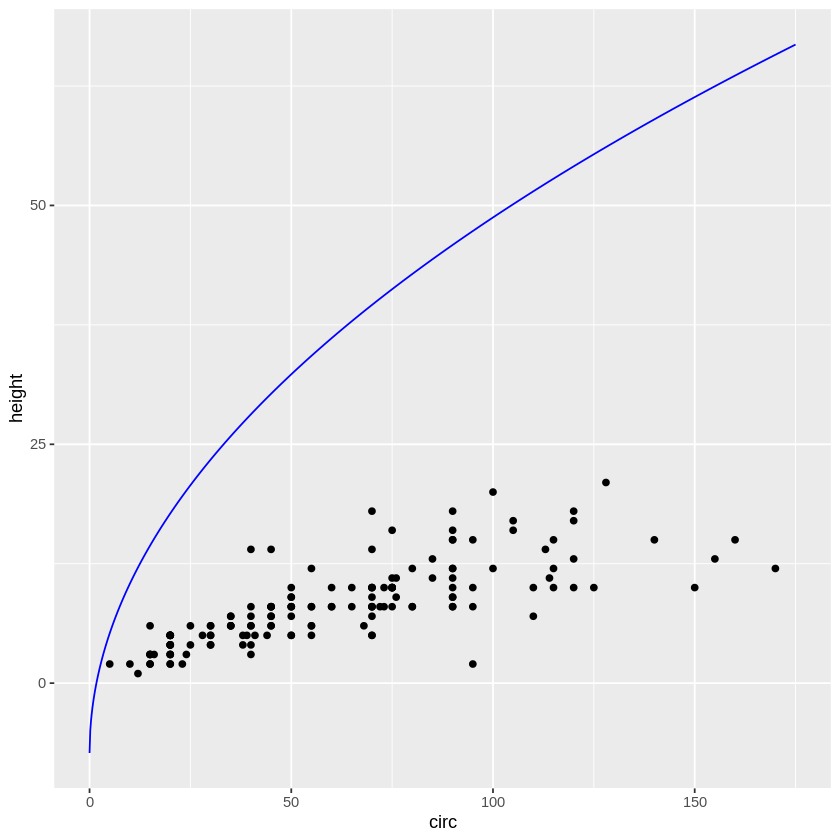

In [62]:
circ_pred <- seq(0,175,len=1000)
height_pred <- multi_reg_2$coefficients[1]+multi_reg_2$coefficients[2]*sqrt(circ_pred)
fct_reg <- data.frame(circ_pred=circ_pred,height_pred=height_pred)

ggplot() +
  geom_point(data=myData,aes(x=circ,y=height)) +
  geom_line(data=fct_reg,aes(x=circ_pred,y=height_pred),col="blue") + 
  stat_smooth(method="lm",se=FALSE) +
  xlab("circ") +
  ylab("height")